# Objaśnienia

1. **UWR** - urządzenie wspomagające ruch (rolki, wrotki, deskorolka, hulajnoga)

   W dniu 20.05.2021r. weszła w życie nowelizacja ustawy Prawo o ruchu drogowym, która wprowadziła pojęcie urządzenia wspomagającego ruch. Zgodnie z nową definicją ustawową urządzenie wspomagające ruch, to: „urządzenie lub sprzęt sportowo-rekreacyjny, przeznaczone do poruszania się osoby w pozycji stojącej, napędzane siłą mięśni;”. [ŹRÓDŁO](<[xd](https://kancelaria-effect.pl/odszkodowania/pozostale-odszkodowania-z-polisy-oc-sprawcy-wypadku/wypadek-na-urzadzeniu-wspomagajacym-ruch-rolkach-deskorolce#co-to-jest-urzadzenie-wspomagajace-ruch-uwr)>)

2. Jeden **wypadek** ma jednego lub wielu **uczestników** (tutaj uczestnika nie rozumiemy jako osobę fizyczną, ale obiekt biorący udział w wypadku typu samochód, pociąg, w szczególności pieszy lub grupa pieszych). Każdy uczestnik ma jedną lub wiele **ofiar** należących do niego (np. kierujący i pasażerowie samochodu, członkowie grupy pieszych, samotny pieszy)
3. Ciężkość wypadku 30 dni oznacza zgon ofiary w ciągu 30 dni


In [46]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

import os
import plotly.express as px

import seaborn as sns


In [47]:
os.chdir('/home/staszek/mgr/gradient/gradient') # switch this to your root folder (the one with the src and data folders)

In [48]:
json_files = glob.glob('data/wypadki-pl/[!metadata]*.json')


In [49]:
for file in json_files:
    print(file)

data/wypadki-pl/2023_25_19_15_25_54_all_events_szczecin_2017_to_2019.json
data/wypadki-pl/2023_13_19_12_13_31_all_events_szczecin_2020_to_2022.json
data/wypadki-pl/2023_51_19_14_51_12_all_events_poznan_2020_to_2022.json
data/wypadki-pl/2023_35_19_16_35_13_all_events_cracow_2017_to_2019.json
data/wypadki-pl/2023_35_05_14_35_54_all_events_warsaw_2019.json
data/wypadki-pl/2023_16_05_13_16_01_all_events_warsaw.json
data/wypadki-pl/2023_50_19_11_50_00_all_events_cracow_2020_to_2022.json
data/wypadki-pl/2023_11_19_14_11_04_all_events_poznan_2017_to_2019.json
data/wypadki-pl/2023_05_19_13_05_58_all_events_warsaw_2017_to_2018.json


In [50]:
all_accidents = pd.concat([pd.read_json(f) for f in json_files], ignore_index=True)

In [51]:
all_accidents

,wsp_gps_x,wsp_gps_y,id_w_czas,czas_zdarzenia,woj_nazwa,pow_nazwa,gmi_nazwa,mie_nazwa,opis_zdarzenia,uczestnicy,zdarzenie_id,id_systemu_zr
0,14.538139,53.429389,2017-01-04,11:42,ZACHODNIOPOMORSKIE,Szczecin,Szczecin,Szczecin,Najechanie na pieszego,{'115427600': {'ofiary': {'Kierujący': {'obraz...,182098761,105323219
1,14.548583,53.425500,2017-01-08,13:09,ZACHODNIOPOMORSKIE,Szczecin,Szczecin,Szczecin,Wypadek z pasażerem,{'115932304': {'ofiary': {'Kierujący': {'obraz...,182100300,105328839
2,14.639111,53.377583,2017-01-20,10:10,ZACHODNIOPOMORSKIE,Szczecin,Szczecin,Szczecin,Zderzenie pojazdów tylne,{'115302127': {'ofiary': {'Kierujący': {'obraz...,182111752,105359627
3,14.537139,53.414833,2017-01-21,18:10,ZACHODNIOPOMORSKIE,Szczecin,Szczecin,Szczecin,Zderzenie pojazdów boczne,{'115650127': {'ofiary': {'Kierujący': {'obraz...,182112357,105361982
4,14.591111,53.406639,2017-01-30,14:10,ZACHODNIOPOMORSKIE,Szczecin,Szczecin,Szczecin,Najechanie na pieszego,{'115494314': {'ofiary': {'Kierujący': {'obraz...,182118758,105387203
...,...,...,...,...,...,...,...,...,...,...,...,...
18166,20.985416,52.221083,2018-10-11,21:57,MAZOWIECKIE,Warszawa,Warszawa,Warszawa,Zderzenie pojazdów boczne,{'123676847': {'ofiary': {'Kierujący': {'obraz...,186773917,107369756
18167,21.036944,52.206694,2018-10-18,13:00,MAZOWIECKIE,Warszawa,Warszawa,Warszawa,Najechanie na pieszego,{'': {'ofiary': {'Pieszy': {'obrazenia': ['30 ...,186776202,107387087
18168,21.080138,52.204944,2018-10-31,17:05,MAZOWIECKIE,Warszawa,Warszawa,Warszawa,Zderzenie pojazdów boczne,{'123081392': {'ofiary': {'Kierujący': {'obraz...,186781342,107417006
18169,21.088861,52.212167,2018-12-19,19:50,MAZOWIECKIE,Warszawa,Warszawa,Warszawa,Zderzenie pojazdów tylne,{'123218727': {'ofiary': {'Kierujący': {'obraz...,186797581,107515248


In [52]:
all_accidents.drop_duplicates(['wsp_gps_x', 'wsp_gps_y', 'zdarzenie_id', 'id_systemu_zr'], inplace=True, ignore_index=True)

In [53]:
all_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16631 entries, 0 to 16630
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wsp_gps_x       16631 non-null  float64
 1   wsp_gps_y       16631 non-null  float64
 2   id_w_czas       16631 non-null  object 
 3   czas_zdarzenia  16631 non-null  object 
 4   woj_nazwa       16631 non-null  object 
 5   pow_nazwa       16631 non-null  object 
 6   gmi_nazwa       16631 non-null  object 
 7   mie_nazwa       16631 non-null  object 
 8   opis_zdarzenia  16631 non-null  object 
 9   uczestnicy      16631 non-null  object 
 10  zdarzenie_id    16631 non-null  int64  
 11  id_systemu_zr   16631 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 1.5+ MB


In [54]:
participants_df = all_accidents[['id_systemu_zr', 'uczestnicy']]
participants_df.loc[:, ['uczestnicy']] = participants_df['uczestnicy'].apply(lambda x: [(k, x[k]) for k in x.keys()])
participants_df = participants_df.explode('uczestnicy')

assert all_accidents['id_systemu_zr'].is_unique
participants_df[['ucz_id', 'ofiary']] = participants_df['uczestnicy'].apply(pd.Series)
participants_df.drop('uczestnicy', axis=1, inplace=True)
participants_df['ucz_id'].where(participants_df['ucz_id'] != '', participants_df.index, inplace=True)
assert participants_df['ucz_id'].is_unique

participants_df['opis_pojazdu'] = participants_df['ofiary'].apply(lambda x: x['opis_pojazdu'])
participants_df['ofiary'] = participants_df['ofiary'].apply(lambda x: x['ofiary'])

participants_df.reset_index( inplace=True, drop=True)
participants_df

,id_systemu_zr,ucz_id,ofiary,opis_pojazdu
0,105323219,115427600,{'Kierujący': {'obrazenia': ['Brak obrażeń']}},Samochód osobowy
1,105323219,0,{'Pieszy': {'obrazenia': ['Ciężko']}},Nie dotyczy
2,105328839,115932304,"{'Kierujący': {'obrazenia': ['Brak obrażeń']},...",Autobus komunikacji publicznej
3,105359627,115302127,{'Kierujący': {'obrazenia': ['Ciężko']}},Samochód osobowy
4,105359627,115302126,{'Kierujący': {'obrazenia': ['Brak obrażeń']}},Samochód osobowy
...,...,...,...,...
32971,107387087,16629,{'Pieszy': {'obrazenia': ['30 dni']}},Nie dotyczy
32972,107387087,123263855,{'Kierujący': {'obrazenia': ['Brak obrażeń']}},Samochód osobowy
32973,107417006,123081392,{'Kierujący': {'obrazenia': ['Brak obrażeń']}},"Samochód ciężarowy DMC powyżej 3,5 T"
32974,107417006,123081393,{'Kierujący': {'obrazenia': ['Na miejscu']}},Motocykl inny


In [55]:
casualties_df = participants_df[['ucz_id', 'ofiary']]
casualties_df.loc[:, 'ofiary'] = casualties_df['ofiary'].apply(lambda x: [(k, x[k]) for k in x.keys()])
casualties_df = casualties_df.explode('ofiary')
casualties_df[['typ_ofiary', 'rodzaj_obrazen']] = casualties_df['ofiary'].apply(pd.Series)
casualties_df.drop('ofiary', axis=1, inplace=True)
casualties_df['rodzaj_obrazen'] = casualties_df['rodzaj_obrazen'].apply(lambda x: x.get('obrazenia'))
casualties_df= casualties_df.explode('rodzaj_obrazen')
casualties_df.reset_index(inplace=True, drop=True)
casualties_df['id_ofiary'] = casualties_df.index
casualties_df

,ucz_id,typ_ofiary,rodzaj_obrazen,id_ofiary
0,115427600,Kierujący,Brak obrażeń,0
1,0,Pieszy,Ciężko,1
2,115932304,Kierujący,Brak obrażeń,2
3,115932304,Pasażer,Ciężko,3
4,115302127,Kierujący,Ciężko,4
...,...,...,...,...
37807,16629,Pieszy,30 dni,37807
37808,123263855,Kierujący,Brak obrażeń,37808
37809,123081392,Kierujący,Brak obrażeń,37809
37810,123081393,Kierujący,Na miejscu,37810


In [56]:
participants_df.drop(columns=['ofiary'], inplace=True)
participants_df

,id_systemu_zr,ucz_id,opis_pojazdu
0,105323219,115427600,Samochód osobowy
1,105323219,0,Nie dotyczy
2,105328839,115932304,Autobus komunikacji publicznej
3,105359627,115302127,Samochód osobowy
4,105359627,115302126,Samochód osobowy
...,...,...,...
32971,107387087,16629,Nie dotyczy
32972,107387087,123263855,Samochód osobowy
32973,107417006,123081392,"Samochód ciężarowy DMC powyżej 3,5 T"
32974,107417006,123081393,Motocykl inny


In [57]:
assert ~participants_df.duplicated().any()
assert ~casualties_df.duplicated().any()

In [58]:
# Step 1: Extract year from 'id_w_czas' and create a new column 'year'
all_accidents['year'] = pd.to_datetime(all_accidents['id_w_czas']).dt.year
all_accidents['month'] = pd.to_datetime(all_accidents['id_w_czas']).dt.month
all_accidents['day'] = pd.to_datetime(all_accidents['id_w_czas']).dt.day


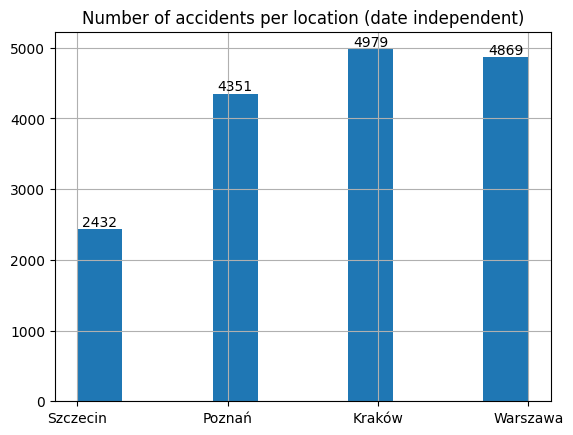

In [59]:
# Set the title
plt.title("Number of accidents per location (date independent)")

# Plot the histogram
all_accidents.mie_nazwa.hist()

# Add numbers above each bar
for rect in plt.gca().patches:
    height = rect.get_height()
    if (height > 0):
        plt.gca().annotate(f"{height:.0f}", (rect.get_x() + rect.get_width() / 2, height),
                        ha='center', va='bottom')

# Show the plot
plt.show()


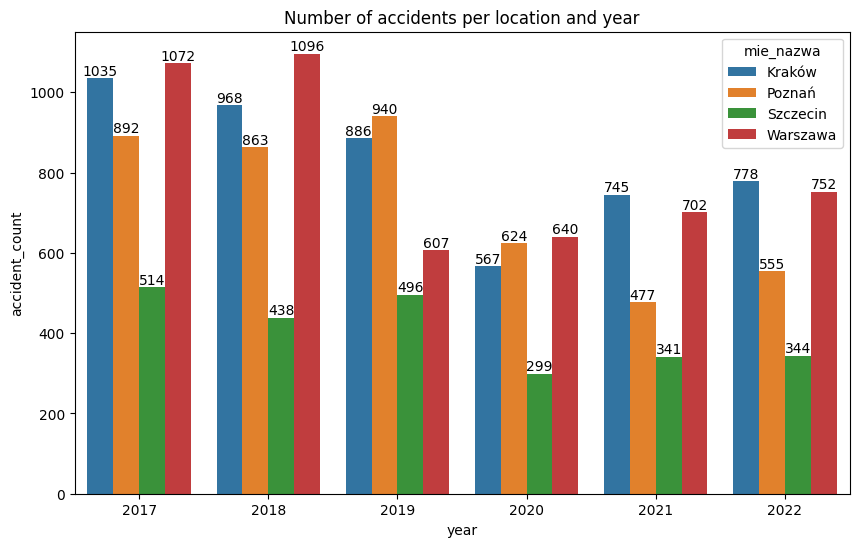

In [60]:

# Step 2: Group by 'mie_nazwa' and 'year', and count accidents
grouped = all_accidents.groupby(['mie_nazwa', 'year']).size()

# Step 3: Reset index
grouped = grouped.reset_index(name='accident_count')

# Step 4: Create bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='year', y='accident_count', hue='mie_nazwa', data=grouped)

# Add numbers above each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom')

plt.title('Number of accidents per location and year')
plt.show()

Niezależnie od roku, w Szczecinie zawsze odnotowywano najmniej wypadków drogowych. Co roku było też inne miasto rekordzistą (2 razy Warszawa, Poznań, znów Warszawa, 2 razy Kraków)


In [61]:
accidents_count = all_accidents.groupby(['year', 'month', 'mie_nazwa']).size().reset_index(name='accident_count')

accidents_count['year_month'] = accidents_count['year'].astype(str) + '-' + accidents_count['month'].astype(str)

accidents_count

,year,month,mie_nazwa,accident_count,year_month
0,2017,1,Kraków,54,2017-1
1,2017,1,Poznań,54,2017-1
2,2017,1,Szczecin,31,2017-1
3,2017,1,Warszawa,50,2017-1
4,2017,2,Kraków,55,2017-2
...,...,...,...,...,...
283,2022,11,Warszawa,38,2022-11
284,2022,12,Kraków,39,2022-12
285,2022,12,Poznań,37,2022-12
286,2022,12,Szczecin,24,2022-12


In [62]:
fig = px.line(accidents_count, x='year_month', y='accident_count', color='mie_nazwa')
fig.update_layout(title='Accident count over time (year and month) for each city', xaxis_title='Year and month', yaxis_title='Accident Count')
fig.show()


Porównując Kraków, Poznań i Warszawę, można zauważyć podobieństwo szeregów czasowych, zwłaszcza od roku 2020 w górę.

W tych 3 miastach od 2020 w górę można zaobserwować powtarzalny rokrocznie trend - pierwsze miesiące (styczeń - kwiecień) są mało wypadkowe (zwykle poniżej 60 miesięcznie), by potem przejść do okresów bardziej wypadkowych (maj - październik)

Szczecin trzeba analizować osobno, bo tam zgłaszano dużo mniej wypadków - widać jednak też, że od 2020 w górę obserwuje się niskie i wysokie wartości w podanych miesiącach.


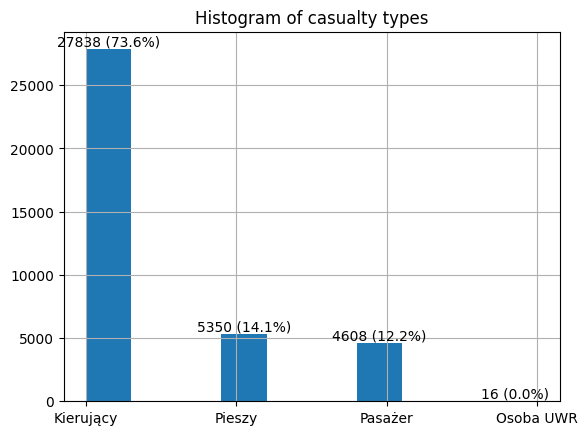

In [63]:
plt.title("Histogram of casualty types")
ax = casualties_df['typ_ofiary'].hist()

# Add numbers above each bar
for rect in ax.patches:
    height = rect.get_height()
    if (height > 0):
        ax.annotate(f"{height:.0f} ({100 * height / len(casualties_df):.1f}%)", (rect.get_x() + rect.get_width() / 2, height),
                    ha='center', va='bottom')

plt.show()


Głównie kierujący pojazdami są poszkodowanymi w wypadkach, choć nie wiadomo na razie, w jakim stopniu (lekkie obrażenia, ciężkie, śmierć itd.)


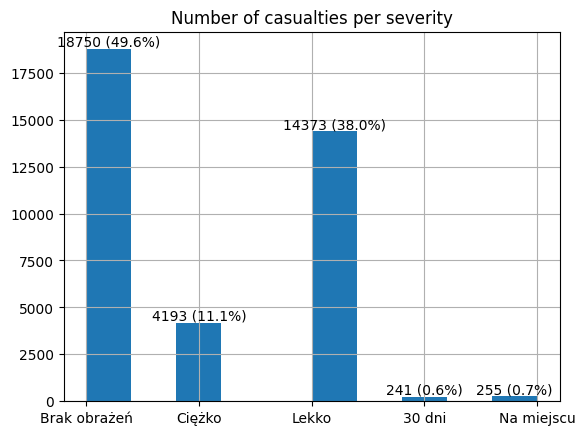

In [64]:
plt.title("Number of casualties per severity")
ax = casualties_df['rodzaj_obrazen'].hist()

# Add numbers above each bar
for rect in ax.patches:
    height = rect.get_height()
    if (height > 0):
        ax.annotate(f"{height:.0f} ({100 * height / len(casualties_df):.1f}%)", (rect.get_x() + rect.get_width() / 2, height),
                    ha='center', va='bottom')

plt.show()

Większość wypadków nie zostawiała na uczestnikach obrażeń lub tylko lekko. Mniej niż 500 osób zginęło w wypadkach (na miejscu lub po).


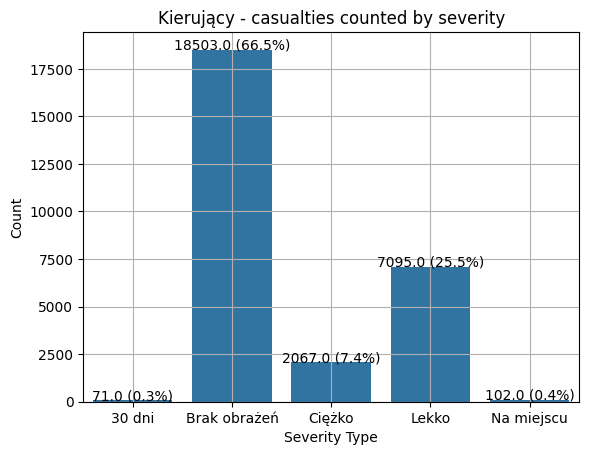

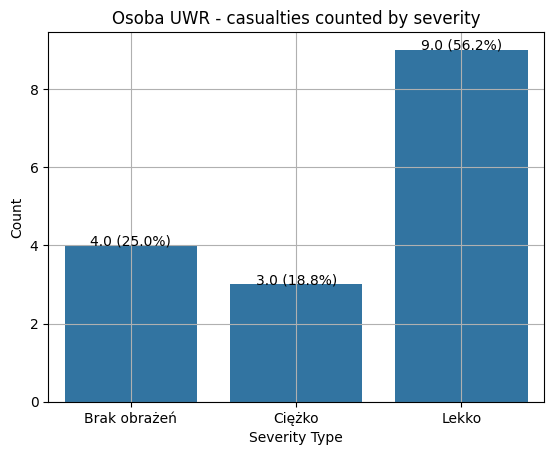

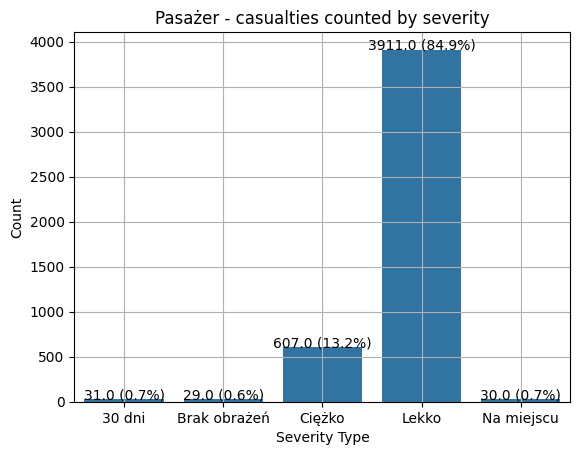

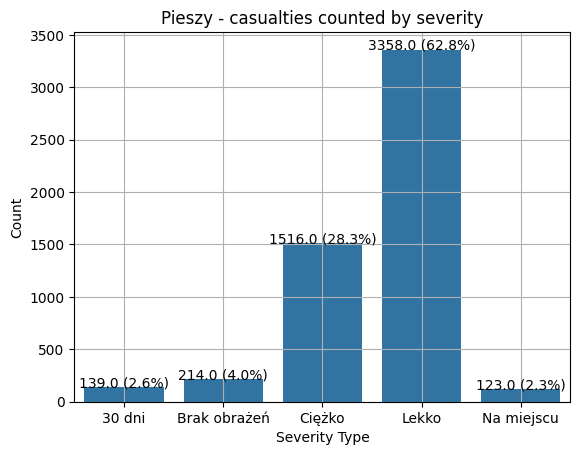

In [65]:
# Group casualties by type and severity
grouped_casualties = casualties_df.groupby(['typ_ofiary', 'rodzaj_obrazen']).size().reset_index(name='count')

# Create a bar plot for each casualty type
for casualty_type in grouped_casualties['typ_ofiary'].unique():
    data = grouped_casualties[grouped_casualties['typ_ofiary'] == casualty_type]
    
    # Calculate the total count for the current casualty type
    total_count = data['count'].sum()

    plt.figure()
    ax = sns.barplot(x='rodzaj_obrazen', y='count', data=data)
    plt.title(f"{casualty_type} - casualties counted by severity")
    plt.xlabel("Severity Type")
    plt.ylabel("Count")
    plt.grid()

    # Add numeric and percentage values above each bar
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{100 * height / total_count:.1f}%'
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height} ({percentage})', ha='center')

    plt.show()

Ponad 66% kierujących pojazdami nie odnosiło żadnych obrażeń przy wypadku lub odnosiło lekkie obrażenia (ok. 25%). Około 0.7% umierało (najniższy odsetek spośród uczestników wypadków)

Pasażerowie w zdecydowanej większości odnosili lekkie obrażenia (ponad 80%). Około 1.4% umierało.

Zdecydowana większość pieszych doznawała lekkich albo ciężkich obrażeń (ponad 90%). Około 4.9% umierało (najwyższy odsetek spośród uczestników wypadków)


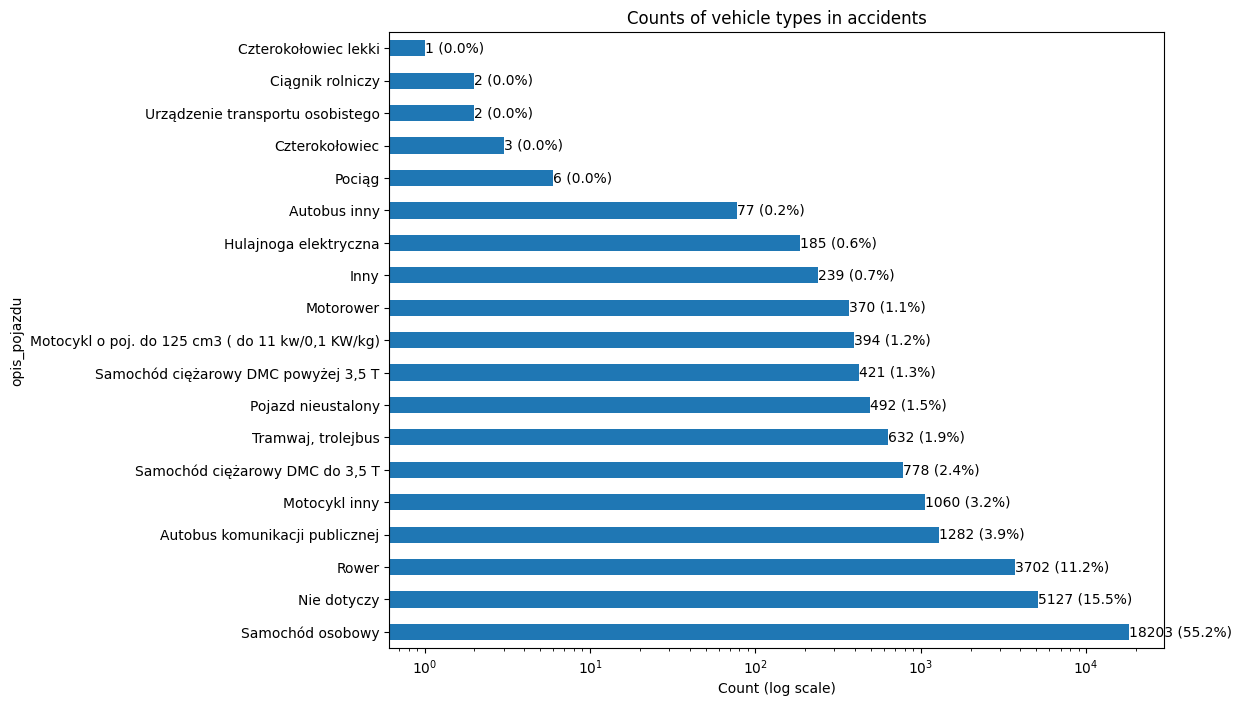

In [66]:
plt.figure(figsize=(10, 8))
ax = participants_df['opis_pojazdu'].value_counts().plot(kind='barh')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
plt.title('Counts of vehicle types in accidents')
plt.xlabel('Count (log scale)')
plt.ylabel('opis_pojazdu')
plt.xscale('log')  # Add log scale to X-axis

# Add count and percentage as text beside each bar
total_count = participants_df['opis_pojazdu'].count()
for p in ax.patches:
    width = p.get_width()
    count = f"{width:.0f}"
    percentage = f"{100 * width / total_count:.1f}%"
    ax.annotate(f"{count} ({percentage})", (width, p.get_y() + p.get_height() / 2),
                va='center')

plt.show()


Większość pojazdów biorących udział w wypadkach (około 55.2%) to samochody osobowe


In [67]:
only_driver_df = casualties_df.merge(participants_df, on='ucz_id')
only_driver_df = only_driver_df[only_driver_df['typ_ofiary'] == 'Kierujący']
only_driver_df


,ucz_id,typ_ofiary,rodzaj_obrazen,id_ofiary,id_systemu_zr,opis_pojazdu
0,115427600,Kierujący,Brak obrażeń,0,105323219,Samochód osobowy
2,115932304,Kierujący,Brak obrażeń,2,105328839,Autobus komunikacji publicznej
4,115302127,Kierujący,Ciężko,4,105359627,Samochód osobowy
5,115302126,Kierujący,Brak obrażeń,5,105359627,Samochód osobowy
6,115650127,Kierujący,Ciężko,6,105361982,Samochód osobowy
...,...,...,...,...,...,...
37805,123822370,Kierujący,Brak obrażeń,37805,107182443,Samochód osobowy
37808,123263855,Kierujący,Brak obrażeń,37808,107387087,Samochód osobowy
37809,123081392,Kierujący,Brak obrażeń,37809,107417006,"Samochód ciężarowy DMC powyżej 3,5 T"
37810,123081393,Kierujący,Na miejscu,37810,107417006,Motocykl inny


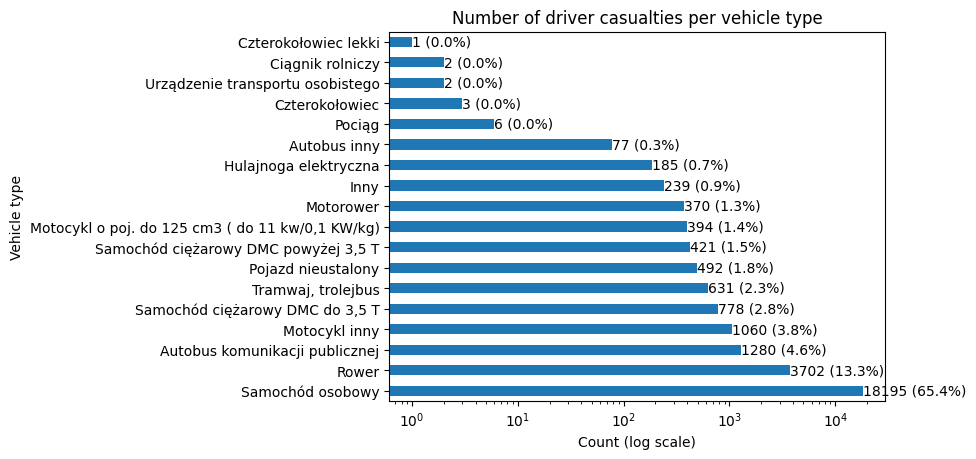

In [68]:
counts = only_driver_df['opis_pojazdu'].value_counts()
total_count = counts.sum()

fig, ax = plt.subplots()
counts.plot(kind='barh', ax=ax)

ax.set_title('Number of driver casualties per vehicle type')
ax.set_xlabel('Count (log scale)')
ax.set_ylabel('Vehicle type')
ax.set_xscale('log')  # Add log scale to X-axis

# Add count and percentage as text beside each bar
for i, count in enumerate(counts):
    percentage = f"{100 * count / total_count:.1f}%"
    ax.text(count, i, f"{count} ({percentage})", va='center')

plt.show()


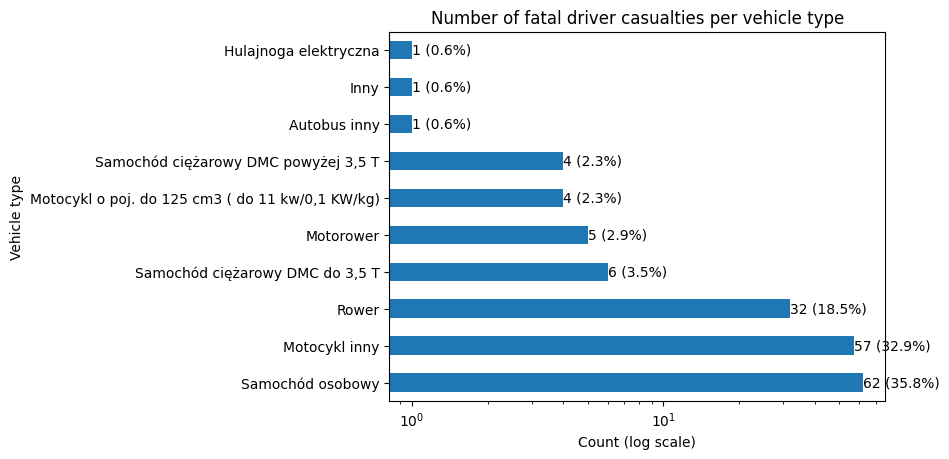

In [69]:
counts = only_driver_df[only_driver_df['rodzaj_obrazen'].isin(['30 dni', 'Na miejscu'])]['opis_pojazdu'].value_counts()
total_count = counts.sum()

fig, ax = plt.subplots()
counts.plot(kind='barh', ax=ax)

ax.set_title('Number of fatal driver casualties per vehicle type')
ax.set_xlabel('Count (log scale)')
ax.set_ylabel('Vehicle type')
ax.set_xscale('log')  # Add log scale to X-axis

# Add count and percentage as text beside each bar
for i, count in enumerate(counts):
    percentage = f"{100 * count / total_count:.1f}%"
    ax.text(count, i, f"{count} ({percentage})", va='center')

Większość ofiar kierujących pojazdami kierowało samochodem (ok. 65.4%), rowerem (ok. 13.3%), motocyklem (ok. 5.2%) lub autobusem komunikacji publicznej (ok. 4.6%)

Ok. 35.8% wszystkich śmiertelnych ofiar wypadków (wśród kierujących pojazdami) to kierowcy samochodów. Ok. 35.2% to kierowcy motocykli.


In [70]:
all_accidents.to_csv('data/wypadki-pl/accidents.csv', index=False)
casualties_df.to_csv('data/wypadki-pl/casualties.csv', index=False)
participants_df.to_csv('data/wypadki-pl/participants.csv', index=False)
